## Set the repository path

In [1]:
pyCPT_path = '../'

## Import modules

In [2]:
# Add the repository path into python path
import sys
sys.path.append(pyCPT_path)

# Import modules
import pyCPT
import post_process
import numpy as np
import matplotlib.pyplot as plt

## Read the NGES dataset
#### Note: 1) Data file should contain 3 columns: ( depth, Fr, Qt ); 2) Data should start from the 1st row!

Number of data points:  [296]
Fitting model with number of components =  1
Fitting model with number of components =  2
Fitting model with number of components =  3
Fitting model with number of components =  4
Fitting model with number of components =  5
Fitting model with number of components =  6
Fitting model with number of components =  7
Fitting model with number of components =  8
Fitting model with number of components =  9
Fitting model with number of components =  10


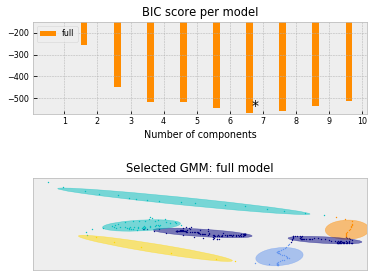

In [21]:
# By default, model selection using BIC is performed
datapath = '../test_data/NGES_data.csv'
cpt1 = pyCPT.CPT(datapath)

Number of data points:  [296]
Fitting model with number of components =  1
Fitting model with number of components =  2
Fitting model with number of components =  3
Fitting model with number of components =  4
Fitting model with number of components =  5
Fitting model with number of components =  6
Fitting model with number of components =  7
Fitting model with number of components =  8
Fitting model with number of components =  9
Fitting model with number of components =  10


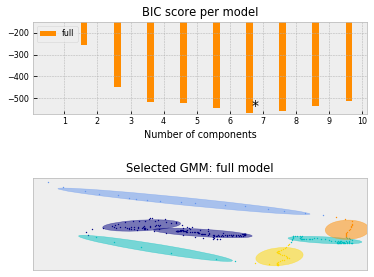

In [13]:
# By default, model selection using BIC is performed
datapath = '../test_data/NGES_data.csv'
cpt2 = pyCPT.CPT(datapath)

In [3]:
# If explicitly turn off model selection option, no optimal number of cluster will be inferred.
datapath = '../test_data/NGES_data.csv'
cpt3 = pyCPT.CPT(datapath,do_model_selection=False)

Number of data points:  [296]


## Extract soil segments

In [25]:
# No prior information is available, the proposal function uses the default parameters
cpt1.segmentation(num_of_iter=2000, start_iter=1500)

Fitting the initial Gaussian mixture model...
Initial GMM fitting is done!


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:03<00:00, 16.17it/s]


In [15]:
# No prior information is available, the proposal function uses the user defined parameters
cpt2.segmentation(num_of_iter=2000, start_iter=1500,
                  mu_jump_length=0.1,
                  theta_jump_length=0.1, 
                  cov_volume_jump_length=0.1,
                  r_anneal=0.01, anneal_start=0.5, anneal_end=0.75)

Fitting the initial Gaussian mixture model...
Initial GMM fitting is done!


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:04<00:00, 15.63it/s]


In [8]:
# if prior information is available
# prior knowledge of the center of each cluster
prior_mus = np.array([[0.3346648 , 1.78172949],
                    [0.47575528, 1.59408055],
                    [0, 2.5],
                    [0.63169082, 1.03545094],
                    [0.78032598, 1.6645969 ],
                    [0.72301104, 1.44057298],
                    [0.36804063, 1.23878841]])
# the standard deviation of the center coordinates
prior_mu_cov = [100,100,100,100,100,100,100]
# prior knowledge of the covariance matrix of each cluster
prior_covs = np.array([[[ 0.1,  0],
        [ 0,  0.1]],

       [[0.1, 0],
        [0,  0.1]],

       [[ 0.1,  0],
        [ 0,  0.1]],

       [[ 0.1, 0],
        [0,  0.1]],

       [[ 0.1, 0],
        [0,  0.1]],

       [[ 0.1,  0],
        [ 0,  0.1]],

       [[0.1, 0],
        [0,  0.1]]])

In [9]:
cpt3.segmentation(num_of_iter=2000, start_iter=1500, 
                  prior_mus=prior_mus, 
                  prior_mu_cov=prior_mu_cov, 
                  prior_covs=prior_covs, 
                  mu_jump_length=0.1,
                  theta_jump_length=0.1, 
                  cov_volume_jump_length=0.1,
                  r_anneal=0.01, anneal_start=0.5, anneal_end=0.75)

Fitting the initial Gaussian mixture model...
Initial GMM fitting is done!


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:59<00:00, 17.30it/s]


## Soil interpretation

In [26]:
cpt1.detect_layers()
cpt2.detect_layers()
cpt3.detect_layers()

## Visualization

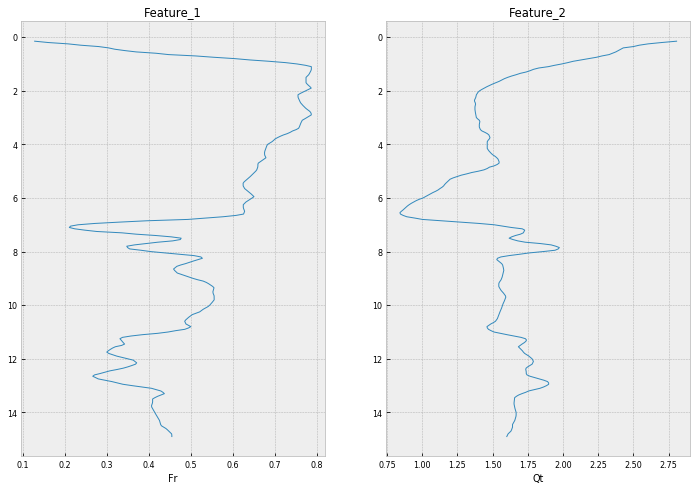

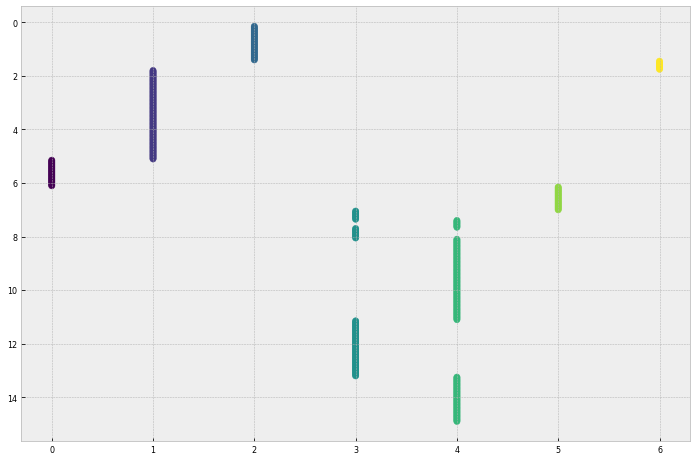

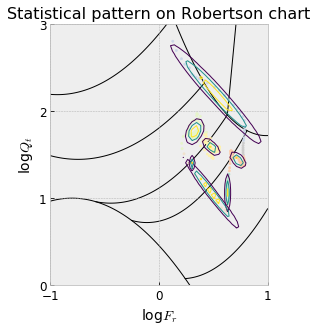

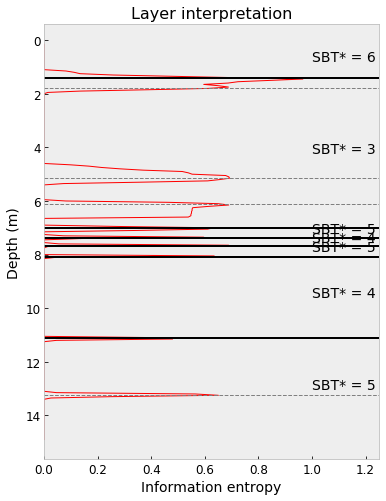

In [27]:
post_process.plot_feature(cpt1.element,xlabel=['Fr','Qt'], scatter=False) # show the CPT data
post_process.plot_image(cpt1.element, cpt1.element.label_map_est) # show the spatial pattern
pyCPT.mixture_plot_robertson_chart(cpt1, aspect=0.8) # show the statistical pattern
pyCPT.plot_layers(cpt1) # show the soil layers

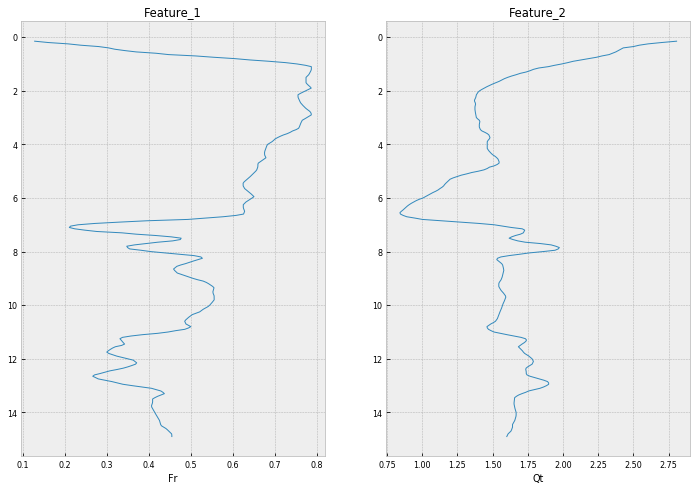

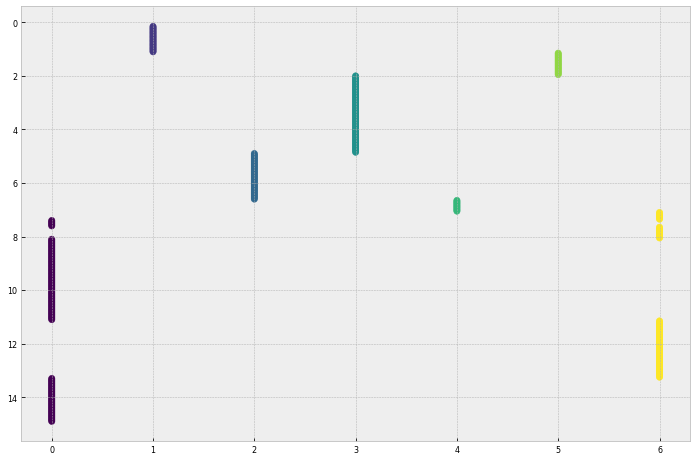

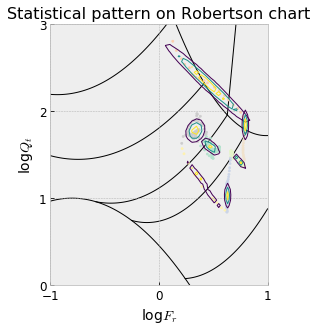

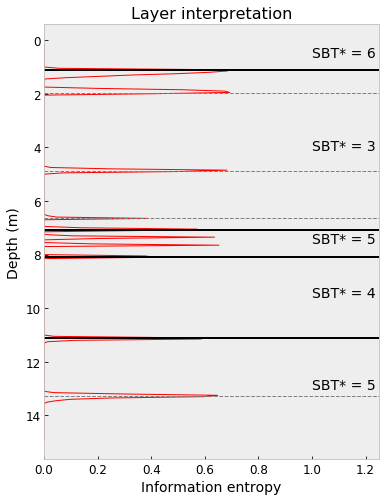

In [18]:
post_process.plot_feature(cpt2.element,xlabel=['Fr','Qt'], scatter=False) # show the CPT data
post_process.plot_image(cpt2.element, cpt2.element.label_map_est) # show the spatial pattern
pyCPT.mixture_plot_robertson_chart(cpt2, aspect=0.8) # show the statistical pattern
pyCPT.plot_layers(cpt2) # show the soil layers

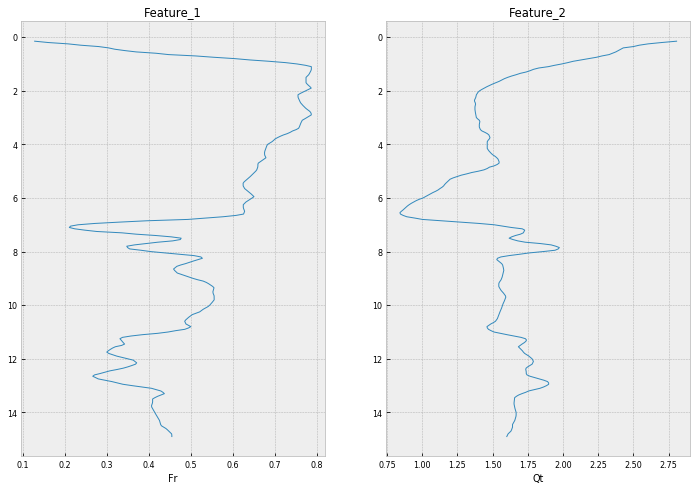

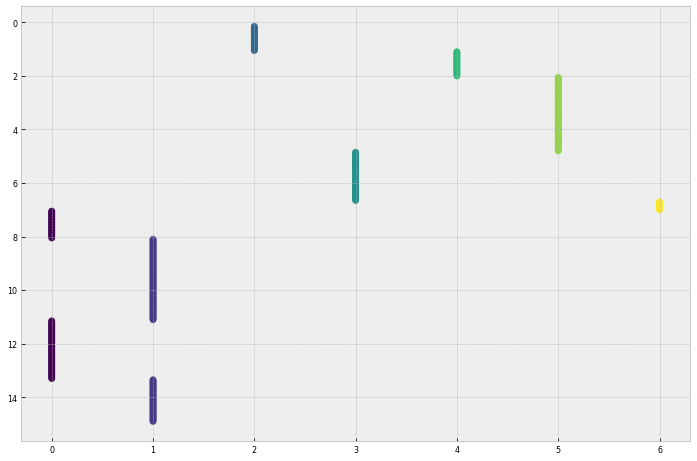

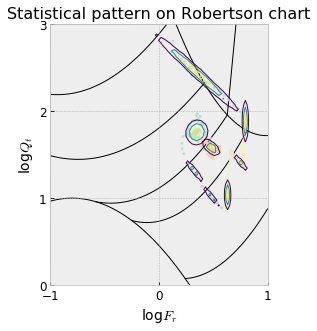

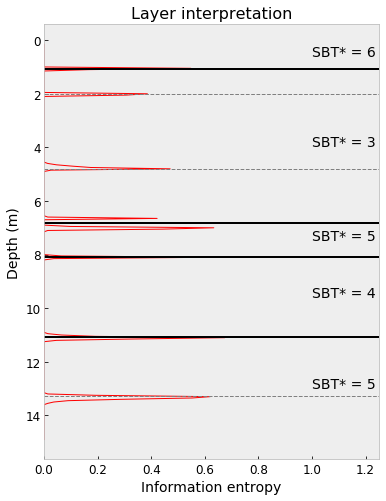

In [10]:
post_process.plot_feature(cpt3.element,xlabel=['Fr','Qt'], scatter=False) # show the CPT data
post_process.plot_image(cpt3.element, cpt3.element.label_map_est) # show the spatial pattern
pyCPT.mixture_plot_robertson_chart(cpt3, aspect=0.8) # show the statistical pattern
pyCPT.plot_layers(cpt3) # show the soil layers

#### Identified issue: When you test the repository by using the on-line interactive binder version, some noise contour lines could show up in the contour plot on the Roberson chart. This is an identified issue and probabily related to the version of the package "matplotlib" in MyBinder.org. The colone version from the github repository does not have such behavior.

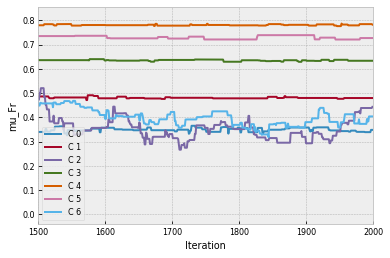

In [28]:
plt.figure
for k in range(7):
    plt.plot([cpt3.element.mus[i][k,0] for i in range(2000)], label=('C '+ str(k)))

plt.xlim(1500,2000)
plt.legend()
plt.ylabel('mu_Fr')
plt.xlabel('Iteration')
plt.show()

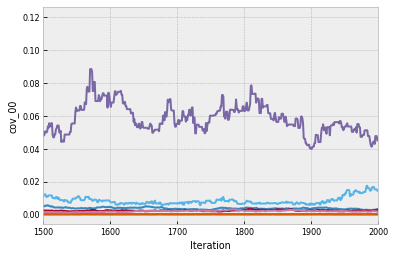

In [29]:
plt.figure
for k in range(7):
    plt.plot([cpt3.element.covs[i][k,0,0] for i in range(2000)])

plt.xlim(1500,2000)    
plt.ylabel('cov_00')
plt.xlabel('Iteration')
plt.show()

In [ ]:
cpt3.element.betas